In [ ]:
%%script false
%cd /content/drive/MyDrive/Google Colab/NLP/Technometrics

/content/drive/MyDrive/Google Colab/NLP/Technometrics


In [ ]:
import pandas as pd
import numpy as np
from statistics import mean, mode, median
import re

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

from gensim.models import FastText
%matplotlib inline

In [ ]:
raw_train_data = pd.read_csv('Dataset/train.csv')
raw_test_data = pd.read_csv('Dataset/test.csv')

In [ ]:
print(len(raw_train_data))
print(len(raw_test_data))

98883
98884


#Test Data Analysis

In [ ]:
raw_test_data.head()

,category,text,cleanText
0,education,"অধ্যায়-২প্রিয় পরীক্ষার্থী, আজ তথ্য ও যোগাযোগ প...",অধ্যায় প্রিয় পরীক্ষার্থী তথ্য যো...
1,sports,"স্পিন, স্পিন, স্পিন। লর্ডসে ইয়াসির শাহ্‌র লেগ ...",স্পিন স্পিন স্পিন লর্ডসে ইয়াসির ...
2,international,সিরিয়ার উত্তর-পশ্চিমাঞ্চলে গতকাল রোববার বিমান...,সিরিয়ার উত্তর পশ্চিমাঞ্চলে গতকাল ...
3,international,দক্ষিণ আফ্রিকার কেপটাউন বিশ্ববিদ্যালয়ের (ইউসিট...,দক্ষিণ আফ্রিকার কেপটাউন বিশ্ববিদ্যা...
4,technology,সহজে ডিজিটাল আর্থিক সেবা দিতে অ্যাপ ও ডিজিটাল ...,সহজে ডিজিটাল আর্থিক সেবা অ্যাপ ...


In [ ]:
print('Maximum length of given Clean Text : ',max(len(x) for x in raw_test_data['cleanText']))
print('Minimum length of given Clean Text : ',min(len(x) for x in raw_test_data['cleanText']))
print("Average length of given Clean Text :  {:.2f}".format(mean(len(x) for x in raw_test_data['cleanText'])))
print('Average length of given Clean Text : ',mode(len(x) for x in raw_test_data['cleanText']))

Maximum length of given Clean Text :  54766
Minimum length of given Clean Text :  9
Average length of given Clean Text :  1830.12
Average length of given Clean Text :  429


In [ ]:
raw_test_data.describe()

,category,text,cleanText
count,98884,98884,98884
unique,7,98384,97880
top,sports,"প্রিয় শিক্ষার্থী বন্ধুরা, তোমাদের হাতে আঁকা র...",প্রিয় শিক্ষার্থী বন্ধুরা তোমাদের ...
freq,15883,30,31


In [ ]:
raw_test_data['category'].value_counts()

sports           15883
international    15314
entertainment    15261
state            15183
economy          14488
education        12818
technology        9937
Name: category, dtype: int64

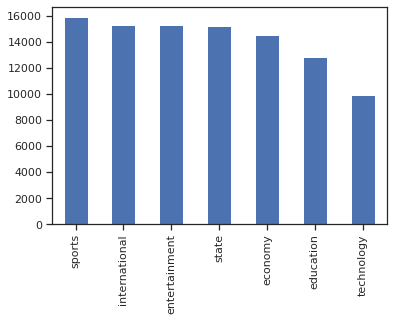

In [ ]:
raw_test_data['category'].value_counts().plot(kind='bar')

#Train Data Analysis

In [ ]:
raw_train_data.head()

,category,text,cleanText
0,economy,বাংলাদেশে সফররত বিশ্ব বাণিজ্য সংস্থা (ডব্লিউট...,বাংলাদেশে সফররত বিশ্ব বাণিজ্য সং...
1,sports,ইউরোপিয়ান ফুটবলে আজ ঝড় বয়ে যাচ্ছে। একদিকে সংবা...,ইউরোপিয়ান ফুটবলে বয়ে একদিকে সংবা...
2,international,বিজেপির নেতৃত্বে ভারতের উত্তর প্রদেশ থেকে শুরু...,বিজেপির নেতৃত্বে ভারতের উত্তর প্...
3,state,নারায়ণগঞ্জের সোনারগাঁ উপজেলার একটি সরকারি প্র...,নারায়ণগঞ্জের সোনারগাঁ উপজেলার সরকা...
4,sports,"‘ছাই থেকে ছাই, ধুলো থেকে ধুলো...’ আধ্যাত্মিক ক...",ছাই ছাই ধুলো ধুলো আধ্যাত্মিক ...


In [ ]:
print('Maximum length of given Clean Text : ',max(len(x) for x in raw_train_data['cleanText']))
print('Minimum length of given Clean Text : ',min(len(x) for x in raw_train_data['cleanText']))
print("Average length of given Clean Text :  {:.2f}".format(mean(len(x) for x in raw_train_data['cleanText'])))
print('Average length of given Clean Text : ',mode(len(x) for x in raw_train_data['cleanText']))

Maximum length of given Clean Text :  53333
Minimum length of given Clean Text :  11
Average length of given Clean Text :  1839.90
Average length of given Clean Text :  821


In [ ]:
raw_train_data.describe()

,category,text,cleanText
count,98883,98883,98883
unique,7,98425,97926
top,sports,"প্রিয় শিক্ষার্থী বন্ধুরা, তোমাদের হাতে আঁকা র...",প্রিয় শিক্ষার্থী বন্ধুরা তোমাদের ...
freq,15672,25,25


In [ ]:
raw_train_data['category'].value_counts()

sports           15672
international    15540
state            15362
entertainment    15198
economy          14430
education        12674
technology       10007
Name: category, dtype: int64

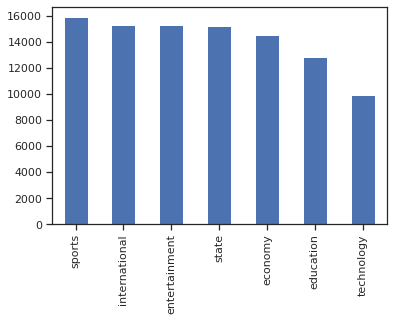

In [ ]:
raw_test_data['category'].value_counts().plot(kind='bar')

In [ ]:
raw_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98884 entries, 0 to 98883
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   category   98884 non-null  object
 1   text       98884 non-null  object
 2   cleanText  98884 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


#Preprocessing

## StopWord Removal

In [ ]:
stop_words = pd.read_csv('/Dataset/bangla_stop_word_471.csv')

In [ ]:
stop_words.head()

,stop_word
0,অতএব
1,অথচ
2,অথবা
3,অনুযায়ী
4,অনুযায়ী


In [ ]:
len(raw_train_data['cleanText'][0])

3137

In [ ]:
print('Maximum length of given Clean Text : ',max(len(x) for x in raw_train_data['cleanText']))
print('Minimum length of given Clean Text : ',min(len(x) for x in raw_train_data['cleanText']))
print("Average length of given Clean Text :  {:.2f}".format(mean(len(x) for x in raw_train_data['cleanText'])))
print('Average length of given Clean Text : ',mode(len(x) for x in raw_train_data['cleanText']))

Maximum length of given Clean Text :  53333
Minimum length of given Clean Text :  11
Average length of given Clean Text :  1839.90
Average length of given Clean Text :  821


In [ ]:
raw_train_data['cleanText'] = raw_train_data['cleanText'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words['stop_word']))

In [ ]:
#raw_train_data.to_csv('train_data_stop_raw.csv', encoding='utf-8', index=False)

In [ ]:
print('Total row in Train Data            : ',len(raw_train_data))
print('Maximum length of given Clean Text : ',max(len(x) for x in raw_train_data['cleanText']))
print('Minimum length of given Clean Text : ',min(len(x) for x in raw_train_data['cleanText']))
print("Average length of given Clean Text :  {:.2f}".format(mean(len(x) for x in raw_train_data['cleanText'])))
print('Average length of given Clean Text : ',mode(len(x) for x in raw_train_data['cleanText']))

Total row in Train Data            :  98883
Maximum length of given Clean Text :  37603
Minimum length of given Clean Text :  7
Average length of given Clean Text :  1302.70
Average length of given Clean Text :  727


In [ ]:
len(raw_train_data['cleanText'][0])

2257

## Tokenizeing Text

In [ ]:
train_data_x = pd.DataFrame()
train_data_x['cleanText'] = raw_train_data['cleanText'].apply(lambda x: x.split(' '))

In [ ]:
print(len(train_data_x))
print(len(train_data_x['cleanText'][0]))

98883
293


In [ ]:
#%%script false
print('Total row in Train Data      : ',len(train_data_x))
print('Maximum length of Train Word : ',max(len(x) for x in train_data_x['cleanText']))
print('Minimum length of Train Word : ',min(len(x) for x in train_data_x['cleanText']))
print("Average length of Train Word :  {:.2f}".format(mean(len(x) for x in train_data_x['cleanText'])))
print('Mode length of Train Word    : ',mode(len(x) for x in train_data_x['cleanText'])) # Value that occur most often

Total row in Train Data      :  98883
Maximum length of Train Word :  5243
Minimum length of Train Word :  1
Average length of Train Word :  178.73
Mode length of Train Word    :  117


## Outlier Checking

In [ ]:
%%html
<marquee style='width: 50%; color: red;'><b>!!! Length Ploting of Text !!!</b></marquee>

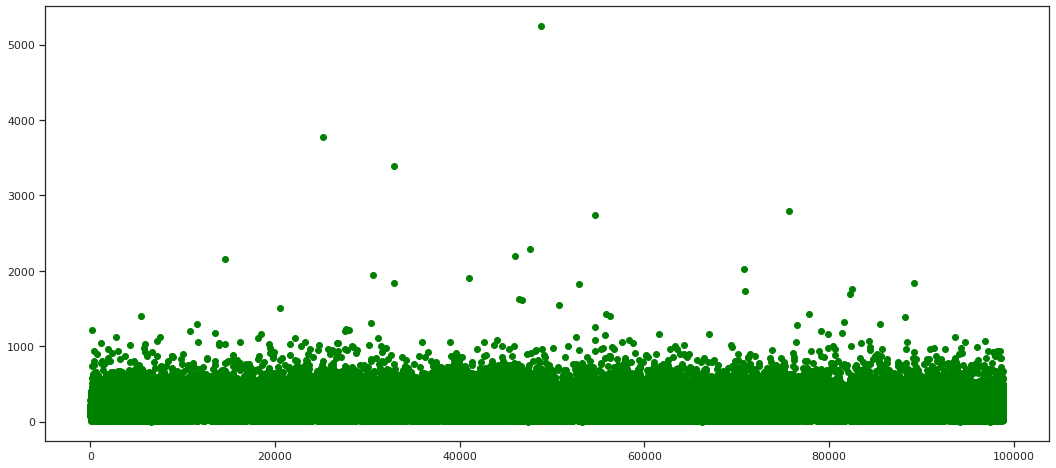

In [ ]:
plt.figure(figsize=(18,8))
plt.scatter(train_data_x['cleanText'].index, train_data_x['cleanText'].apply(lambda x: len(x)), color='green')
plt.show()

## Outlier Removing

In [ ]:
column_names = ['cleanText', 'category']

train_data_full = pd.DataFrame(columns = column_names)

cnt = 0
j = 0
cleanText = []
category = []

for i in train_data_x['cleanText'].apply(lambda x: len(x)):

  if i < 350:
    cleanText.append(train_data_x['cleanText'][j])
    category.append(raw_train_data['category'][j])     
    cnt +=1

  j += 1
  
train_data_full['cleanText'] = cleanText
train_data_full['category'] = category

categor = cleanText = 0

print('Total Row length less then 351 : ',cnt)

Total Row length less then 351 :  90118


In [ ]:
for i in train_data_full['cleanText']:
  if len(i) >= 350 :
    print(len(i))
    print('problem')
    break

In [ ]:
#train_data_full.to_csv('train_data_stop_350.csv', encoding='utf-8', index=False)

In [ ]:
train_data_full.head()

,cleanText,category
0,"[বাংলাদেশে, সফররত, বিশ্ব, বাণিজ্য, সংস্থা, ডব্...",economy
1,"[ইউরোপিয়ান, ফুটবলে, বয়ে, একদিকে, সংবাদমাধ্যমগু...",sports
2,"[বিজেপির, নেতৃত্বে, ভারতের, উত্তর, প্রদেশ, শুর...",international
3,"[নারায়ণগঞ্জের, সোনারগাঁ, উপজেলার, সরকারি, প্র...",state
4,"[ছাই, ছাই, ধুলো, ধুলো, আধ্যাত্মিক, ব্যবহৃত, বা...",sports


In [ ]:
train_data_full['category'].value_counts()

international    14621
sports           14433
state            14134
entertainment    14121
economy          12219
education        11220
technology        9370
Name: category, dtype: int64

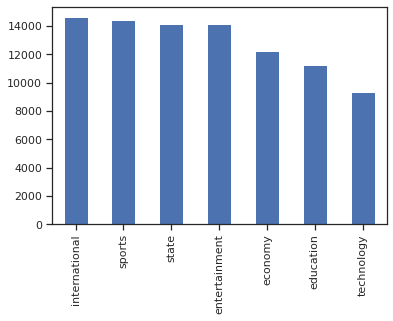

In [ ]:
train_data_full['category'].value_counts().plot(kind='bar')

In [ ]:
%%script false
fig=plt.figure(figsize=(12,6))
ax=fig.add_axes([0,0,1,1])

ax.scatter(X_test.index, y_main, color='red')
ax.scatter(X_test.index, y_pred, color='green')

ax.set_ylabel('Completion Ratio')
ax.set_xlabel('Driver Id')
ax.set_title('Completion Ratio end Of the Week')
plt.legend(['Actual Result', 'Model Predict'], loc='upper left')
plt.show()

In [ ]:
raw_train_data['cleanText'][0]

'বাংলাদেশে সফররত বিশ্ব বাণিজ্য সংস্থা ডব্লিউটিও মহাপরিচালক এইচইএম রবার্তো আজেভেদো রাজনৈতিক সিদ্ধান্তই যুক্তরাষ্ট্রের বাজারে বাংলাদেশের তৈরি পোশাক রফতানির শুল্ক কোটামুক্ত বাণিজ্য সুবিধা পাওয়ার বিষয়টি নিশ্চিত ইস্যুটির সমাধান খুব সহজ সম্ভব চলতি বছরের শেষ বালি প্যাকেজে নেয়া গুরুত্বপূর্ণ তিনটি সিদ্ধান্ত ডিউটি ফ্রি কোটা ফ্রি মার্কেট অ্যাকসেস রুলস অরিজিন সার্ভিস ওয়েভার সুবিধার অগ্রগতি বাংলাদেশকেও বালি প্যাকেজ বাস্তবায়নে স্বল্পোন্নত দেশগুলোর এলডিসি জোট কাজ মঙ্গলবার রাজধানীর সোনারগাঁও হোটেলে বিজিএমইএ বিকেএমইএ আয়োজিত মধ্যহ্নভোজ সভায় মুখ্য আলোচকের বক্তব্যে এসব কথা ডব্লিউটিওর মহাপরিচালকের সম্মানে আয়োজিত অনুষ্ঠানে প্রধান অতিথির বক্তব্য রাখেন বাণিজ্যমন্ত্রী তোফায়েল আহমেদ বিজিএমইএর সভাপতি শহীদুল্লাহ আজিমের সঞ্চালনায় অনুষ্ঠানে অন্যান্যের এফবিসিসিআই সভাপতি কাজী আকরাম উদ্দীন বাণিজ্য সচিব মাহবুব আহমেদ ডিসিসিআই সভাপতি শাহজাহান খান বিজিএমইএ সভাপতি আতিকুল ইসলাম বিকেএমইএ ভারপ্রাপ্ত সভাপতি মোহাম্মদ হাতেম প্রমুখ উপস্থিত ডব্লিউটিও মহাপরিচালক ডব্লিটিও বিভিন্ন বাংলাদেশ গুরুত্বপূর্ণ ভূমিকা পালন আসছে সালেও হংকং প্

In [ ]:
print(train_data_x['cleanText'][0])

['বাংলাদেশে', 'সফররত', 'বিশ্ব', 'বাণিজ্য', 'সংস্থা', 'ডব্লিউটিও', 'মহাপরিচালক', 'এইচইএম', 'রবার্তো', 'আজেভেদো', 'রাজনৈতিক', 'সিদ্ধান্তই', 'যুক্তরাষ্ট্রের', 'বাজারে', 'বাংলাদেশের', 'তৈরি', 'পোশাক', 'রফতানির', 'শুল্ক', 'কোটামুক্ত', 'বাণিজ্য', 'সুবিধা', 'পাওয়ার', 'বিষয়টি', 'নিশ্চিত', 'ইস্যুটির', 'সমাধান', 'খুব', 'সহজ', 'সম্ভব', 'চলতি', 'বছরের', 'শেষ', 'বালি', 'প্যাকেজে', 'নেয়া', 'গুরুত্বপূর্ণ', 'তিনটি', 'সিদ্ধান্ত', 'ডিউটি', 'ফ্রি', 'কোটা', 'ফ্রি', 'মার্কেট', 'অ্যাকসেস', 'রুলস', 'অরিজিন', 'সার্ভিস', 'ওয়েভার', 'সুবিধার', 'অগ্রগতি', 'বাংলাদেশকেও', 'বালি', 'প্যাকেজ', 'বাস্তবায়নে', 'স্বল্পোন্নত', 'দেশগুলোর', 'এলডিসি', 'জোট', 'কাজ', 'মঙ্গলবার', 'রাজধানীর', 'সোনারগাঁও', 'হোটেলে', 'বিজিএমইএ', 'বিকেএমইএ', 'আয়োজিত', 'মধ্যহ্নভোজ', 'সভায়', 'মুখ্য', 'আলোচকের', 'বক্তব্যে', 'এসব', 'কথা', 'ডব্লিউটিওর', 'মহাপরিচালকের', 'সম্মানে', 'আয়োজিত', 'অনুষ্ঠানে', 'প্রধান', 'অতিথির', 'বক্তব্য', 'রাখেন', 'বাণিজ্যমন্ত্রী', 'তোফায়েল', 'আহমেদ', 'বিজিএমইএর', 'সভাপতি', 'শহীদুল্লাহ', 'আজিমের', 'সঞ্চালনায়', 'অনুষ্ঠানে', 'অ

In [ ]:
len(train_data_x['cleanText'][0])

293

In [ ]:
train_data_x.head()

,cleanText
0,"[বাংলাদেশে, সফররত, বিশ্ব, বাণিজ্য, সংস্থা, ডব্..."
1,"[ইউরোপিয়ান, ফুটবলে, বয়ে, একদিকে, সংবাদমাধ্যমগু..."
2,"[বিজেপির, নেতৃত্বে, ভারতের, উত্তর, প্রদেশ, শুর..."
3,"[নারায়ণগঞ্জের, সোনারগাঁ, উপজেলার, সরকারি, প্র..."
4,"[ছাই, ছাই, ধুলো, ধুলো, আধ্যাত্মিক, ব্যবহৃত, বা..."


In [ ]:
train_data_x.shape # Shape of input  (160008, 15, 200) Shape of output  (160008, 9)

(98883, 1)

# Feature Conversion

In [ ]:
%%html
<marquee style='width: 50%; color: red;'><b>!!! One Hot encode of Category !!!</b></marquee>

In [ ]:
train_data_y = pd.DataFrame()
train_data_y['category'] = train_data_full['category']
one_hot = pd.get_dummies(train_data_y['category'])
train_data_y = train_data_y.drop('category',axis = 1)
train_data_y = train_data_y.join(one_hot)

In [ ]:
train_data_y.head()

,economy,education,entertainment,international,sports,state,technology
0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0


In [ ]:
#fasttext_model = FastText(tokenized_lines, size=200, window=5, min_count=10)
fasttext_model = FastText.load('Pretrained_Models/fasttext_model_20/fasttext_model.model')

In [ ]:
%%html
<marquee style='width: 50%; color: red;'><b>!!! Word2Vec Conversion !!!</b></marquee>

## Convert text to vector by Wort2Vec FastText model

In [ ]:
inp = []
word_to_vec_len = 350                                      # word2vec of input
for i in range(len(train_data_full)):
  k = len(train_data_full['cleanText'][i])
  #print(k)
  temp = []
  for j in range(k):
    try:
      vector_a = fasttext_model.wv.get_vector(train_data_full['cleanText'][i][j])
      temp.append(vector_a)
    except:
      temp.append(np.zeros((20,), dtype=np.float32))
      continue
  if k < word_to_vec_len:                                           # If length is smaller than 15 then fill rest with (20) * 0
    k = word_to_vec_len - k;
    for p in range(k):
      temp.append(np.zeros((20,), dtype=np.float32))
  inp.append(temp)


In [ ]:
print(np.shape(inp)) # (45108, 15, 200)

(90118, 350, 20)


In [ ]:
train_data_full['cleanText'][0][0]

'বাংলাদেশে'

In [ ]:
print('Train input X : ',np.shape(inp))
print('Train input Y : ',train_data_y.shape)

Train input X :  (90118, 350, 20)
Train input Y :  (90118, 7)


## Save data for further use

In [ ]:
# np.save('train_cleanText.npy', np.asarray(inp))
# np.save('train_category.npy', np.asarray(train_data_y))

In [ ]:
%ls

Bi-LSTM_Train.ipynb        Predict_Text.ipynb
Bi-LSTM_Ult.ipynb          Pretrained_Models/
Classification_Algo.ipynb  Process_Data/
Dataset/                   Saved_Model/
External.ipynb             Technometrics_Preprocessing.ipynb


In [ ]:
print(len(train_data_x))
print(len(raw_train_data))

98883
98883


In [ ]:
train_data_x['category'] = raw_train_data['category']
train_data_x.head()

,cleanText,category
0,"[বাংলাদেশে, সফররত, বিশ্ব, বাণিজ্য, সংস্থা, ডব্...",economy
1,"[ইউরোপিয়ান, ফুটবলে, বয়ে, একদিকে, সংবাদমাধ্যমগু...",sports
2,"[বিজেপির, নেতৃত্বে, ভারতের, উত্তর, প্রদেশ, শুর...",international
3,"[নারায়ণগঞ্জের, সোনারগাঁ, উপজেলার, সরকারি, প্র...",state
4,"[ছাই, ছাই, ধুলো, ধুলো, আধ্যাত্মিক, ব্যবহৃত, বা...",sports


In [ ]:
#train_data_x.to_csv('train_data_stop.csv', encoding='utf-8', index=False)

In [ ]:
train_data_x = pd.read_csv('Process_Data/train_data_stop.csv')
train_data_x.head()

,cleanText,category
0,"['বাংলাদেশে', 'সফররত', 'বিশ্ব', 'বাণিজ্য', 'সং...",economy
1,"['ইউরোপিয়ান', 'ফুটবলে', 'বয়ে', 'একদিকে', 'সংবা...",sports
2,"['বিজেপির', 'নেতৃত্বে', 'ভারতের', 'উত্তর', 'প্...",international
3,"['নারায়ণগঞ্জের', 'সোনারগাঁ', 'উপজেলার', 'সরকা...",state
4,"['ছাই', 'ছাই', 'ধুলো', 'ধুলো', 'আধ্যাত্মিক', '...",sports


In [ ]:
inp = train_data_full = raw_train_data = train_data_x = 0

# Feature engineering for Sk-Learn Classifier

In [ ]:
train_data = pd.read_csv('Process_Data/train_data_stop_raw.csv')
test_data  = pd.read_csv('Process_Data/test_data_stop_raw.csv')
train_data.head()

,category,text,cleanText
0,economy,বাংলাদেশে সফররত বিশ্ব বাণিজ্য সংস্থা (ডব্লিউট...,বাংলাদেশে সফররত বিশ্ব বাণিজ্য সংস্থা ডব্লিউটিও...
1,sports,ইউরোপিয়ান ফুটবলে আজ ঝড় বয়ে যাচ্ছে। একদিকে সংবা...,ইউরোপিয়ান ফুটবলে বয়ে একদিকে সংবাদমাধ্যমগুলো নে...
2,international,বিজেপির নেতৃত্বে ভারতের উত্তর প্রদেশ থেকে শুরু...,বিজেপির নেতৃত্বে ভারতের উত্তর প্রদেশ শুরু বিভি...
3,state,নারায়ণগঞ্জের সোনারগাঁ উপজেলার একটি সরকারি প্র...,নারায়ণগঞ্জের সোনারগাঁ উপজেলার সরকারি প্রাথমিক...
4,sports,"‘ছাই থেকে ছাই, ধুলো থেকে ধুলো...’ আধ্যাত্মিক ক...",ছাই ছাই ধুলো ধুলো আধ্যাত্মিক ব্যবহৃত বাক্যের অ...


In [ ]:
test_data.head()

,category,text,cleanText
0,education,"অধ্যায়-২প্রিয় পরীক্ষার্থী, আজ তথ্য ও যোগাযোগ প...",অধ্যায় প্রিয় পরীক্ষার্থী তথ্য যোগাযোগ প্রযুক্ত...
1,sports,"স্পিন, স্পিন, স্পিন। লর্ডসে ইয়াসির শাহ্‌র লেগ ...",স্পিন স্পিন স্পিন লর্ডসে ইয়াসির শাহ্ র লেগ স্প...
2,international,সিরিয়ার উত্তর-পশ্চিমাঞ্চলে গতকাল রোববার বিমান...,সিরিয়ার উত্তর পশ্চিমাঞ্চলে গতকাল রোববার বিমান...
3,international,দক্ষিণ আফ্রিকার কেপটাউন বিশ্ববিদ্যালয়ের (ইউসিট...,দক্ষিণ আফ্রিকার কেপটাউন বিশ্ববিদ্যালয়ের ইউসিটি...
4,technology,সহজে ডিজিটাল আর্থিক সেবা দিতে অ্যাপ ও ডিজিটাল ...,সহজে ডিজিটাল আর্থিক সেবা অ্যাপ ডিজিটাল কেওয়াইস...


In [ ]:
column_names = ['cleanText', 'category']

train_data_full = pd.DataFrame(columns = column_names)

cnt = 0
j = 0
cleanText = []
category = []

for i in train_data['cleanText'].apply(lambda x: len(x.split(' '))):

  if i < 350:
    cleanText.append(train_data['cleanText'][j])
    category.append(train_data['category'][j])     
    cnt +=1

  j += 1
  
train_data_full['cleanText'] = cleanText
train_data_full['category'] = category

categor = cleanText = 0

print('Total Row length less then 351 : ',cnt)

Total Row length less then 351 :  90118


In [ ]:
column_names = ['cleanText', 'category']

test_data_full = pd.DataFrame(columns = column_names)

cnt = 0
j = 0
cleanText = []
category = []

for i in test_data['cleanText'].apply(lambda x: len(x.split(' '))):

  if i < 350:
    cleanText.append(test_data['cleanText'][j])
    category.append(test_data['category'][j])     
    cnt +=1

  j += 1
  
test_data_full['cleanText'] = cleanText
test_data_full['category'] = category

categor = cleanText = 0

print('Total Row length less then 351 : ',cnt)

Total Row length less then 351 :  90233


##Feature Conversion

### Tf-IDf of X_train - X_test

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, preprocessing

In [ ]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(train_data_full['cleanText'])

xtrain_tfidf = tfidf_vect.transform(train_data_full['cleanText'])
xvalid_tfidf = tfidf_vect.transform(test_data_full['cleanText'])

In [ ]:
np.shape(xtrain_tfidf)

(90118, 5000)

### Lebel encoding of Y_train, Y_test

In [ ]:
encoder = preprocessing.LabelEncoder()

train_y = encoder.fit_transform(train_data_full['category'])
valid_y = encoder.fit_transform(test_data_full['category'])

In [ ]:
np.shape(train_y)

(90118,)


# Test Data Preprocess All in one

In [ ]:
%%script false
stop_words = pd.read_csv('Dataset/bangla_stop_word_471.csv')
raw_test_data['cleanText'] = raw_test_data['cleanText'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words['stop_word']))

#raw_test_data.to_csv('test_data_stop_raw.csv', encoding='utf-8', index=False)    
test_data_x = pd.DataFrame()
test_data_x['cleanText'] = raw_test_data['cleanText'].apply(lambda x: x.split(' '))

column_names = ['cleanText', 'category']

test_data_full = pd.DataFrame(columns = column_names)

cnt = 0
j = 0
cleanText = []
category = []

for i in test_data_x['cleanText'].apply(lambda x: len(x)):

  if i < 350:
    cleanText.append(test_data_x['cleanText'][j])
    category.append(raw_test_data['category'][j])     
    cnt +=1

  j += 1
  
test_data_full['cleanText'] = cleanText
test_data_full['category'] = category

category = cleanText = 0

print('Total Row length less then 351 : ',cnt)

for i in test_data_full['cleanText']:
  if len(i) >= 350 :
    print(len(i))
    print('problem')
    break


#test_data_full.to_csv('test_data_stop_350.csv', encoding='utf-8', index=False)

test_data_y = pd.DataFrame()
test_data_y['category'] = test_data_full['category']
one_hot = pd.get_dummies(test_data_y['category'])
test_data_y = test_data_y.drop('category',axis = 1)
test_data_y = test_data_y.join(one_hot)

fasttext_model = FastText.load('Pretrained_Models/fasttext_model_20/fasttext_model.model')

inp = []
word_to_vec_len = 350                                               # word2vec of input
for i in range(len(test_data_full)):
  k = len(test_data_full['cleanText'][i])
  #print(k)
  temp = []
  for j in range(k):
    try:
      vector_a = fasttext_model.wv.get_vector(test_data_full['cleanText'][i][j])
      temp.append(vector_a)
    except:
      temp.append(np.zeros((20,), dtype=np.float32))
      continue
  if k < word_to_vec_len:                                           # If length is smaller than 15 then fill rest with (20) * 0
    k = word_to_vec_len - k;
    for p in range(k):
      temp.append(np.zeros((20,), dtype=np.float32))
  inp.append(temp)

print('Test input X : ',np.shape(inp))
print('Test input Y : ',test_data_y.shape)

# Save to file
print('Save to file ...')
test_data_x['category'] = raw_test_data['category']

# test_data_x.to_csv('test_data_stop.csv', encoding='utf-8', index=False)
# np.save('test_cleanText.npy', np.asarray(inp))
# np.save('test_category.npy', np.asarray(test_data_y))
